In [2]:
from tensorflow import keras

from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Flatten
from keras.models import Model
from glob import glob
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img

import matplotlib.pyplot as plt

In [3]:
##Image Size

image_size = [224,224]

train_path = "Datasets/Train/"
test_path =  "Datasets/Test/"

In [4]:
##Importing the Resnet50 Library

vgg16 = VGG16(input_shape = image_size + [3],weights = "imagenet",include_top = False)

In [5]:
vgg16.trainable = False

In [6]:
folders = glob("Datasets/Train/*")
len(folders)

10

In [7]:
#Flattening the Layers

x = Flatten()(vgg16.output)

In [8]:
prediction = Dense(len(folders),activation = "softmax")(x)

#Creating the Model Object

model = Model(inputs = vgg16.input,outputs = prediction)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
#Compiling the Model

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = "accuracy")

In [11]:
##Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [12]:
##Creating the training set

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")


Found 600 images belonging to 10 classes.


In [13]:
test_set = train_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = "categorical")

Found 100 images belonging to 10 classes.


In [14]:
from keras.callbacks import EarlyStopping

In [15]:
##Fit the model

final = model.fit_generator(
    training_set,
    steps_per_epoch = len(training_set),
    epochs = 30,
    validation_data = test_set,
    validation_steps = len(test_set),
    callbacks = [EarlyStopping(monitor='val_accuracy', patience=5)]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
10/19 [==============>...............] - ETA: 2:01 - loss: 4.0518 - accuracy: 0.1154

/home/sai/anaconda3/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19/19 [==============================] - 320s 17s/step - loss: 3.5670 - accuracy: 0.1517 - val_loss: 1.8663 - val_accuracy: 0.3900
Epoch 2/30
19/19 [==============================] - 319s 17s/step - loss: 1.6717 - accuracy: 0.4750 - val_loss: 0.9519 - val_accuracy: 0.6500
Epoch 3/30
19/19 [==============================] - 320s 17s/step - loss: 0.9925 - accuracy: 0.6733 - val_loss: 0.5571 - val_accuracy: 0.8600
Epoch 4/30
19/19 [==============================] - 332s 17s/step - loss: 0.7408 - accuracy: 0.7700 - val_loss: 0.4270 - val_accuracy: 0.8800
Epoch 5/30
19/19 [==============================] - 319s 17s/step - loss: 0.5639 - accuracy: 0.8433 - val_loss: 0.3182 - val_accuracy: 0.9200
Epoch 6/30
19/19 [==============================] - 280s 15s/step - loss: 0.4620 - accuracy: 0.8933 - val_loss: 0.2864 - val_accuracy: 0.9400
Epoch 7/30
19/19 [==============================] - 189s 10s/step - loss: 0.3032 - accuracy: 0.9433 - val_loss: 0.1870 - val_accuracy: 0.9900
Epoch 8/30
19/19 

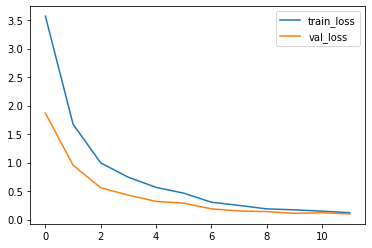

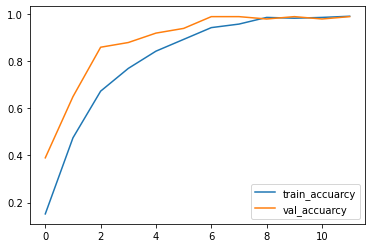

In [16]:
#Plot the Loss
plt.plot(final.history["loss"],label = "train_loss")
plt.plot(final.history["val_loss"],label = "val_loss")
plt.legend()
plt.show()

#Plot the Accuracy
plt.plot(final.history["accuracy"],label = "train_accuarcy")
plt.plot(final.history["val_accuracy"],label = "val_accuarcy")
plt.legend()
plt.show()

In [17]:
##Saving the Model

from keras.models import load_model

model.save("models/model_vgg16.h5")

In [18]:
y_pred = model.predict(test_set)

In [19]:
y_pred[0]

array([6.6670007e-03, 1.0956520e-03, 9.8592329e-01, 1.7378571e-04,
       1.6551907e-04, 6.7314284e-04, 1.5985100e-03, 2.6796823e-03,
       6.6030002e-04, 3.6300815e-04], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred,axis = 1)

In [21]:
y_pred

array([2, 3, 8, 5, 9, 7, 1, 2, 6, 3, 0, 8, 0, 6, 4, 8, 4, 9, 9, 7, 1, 3,
       6, 5, 7, 5, 3, 2, 4, 9, 9, 7, 7, 1, 3, 2, 1, 9, 0, 1, 7, 4, 6, 8,
       3, 6, 3, 5, 2, 9, 1, 9, 4, 5, 1, 2, 0, 2, 2, 1, 4, 6, 4, 8, 7, 8,
       4, 8, 8, 5, 7, 0, 6, 6, 3, 1, 4, 4, 9, 0, 6, 3, 7, 8, 5, 9, 0, 2,
       0, 0, 9, 0, 2, 1, 5, 3, 6, 7, 5, 4])

In [22]:
from keras.preprocessing import image

In [37]:
#Test data

img = load_img("/content/drive/MyDrive/Car_Brand/Datasets/Test/lexus/lexus_1.jpeg",target_size = (224,224))

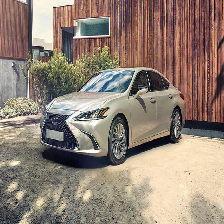

In [38]:
img

In [39]:
img_data = image.img_to_array(img)

In [40]:
img_data.shape

(224, 224, 3)

In [41]:
#Scaling the pixel values of image
img_data = img_data/255
img_data = np.expand_dims(img_data,axis = 0)

In [42]:
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[3.2405098e-04, 3.6721904e-05, 4.6521000e-04, 9.2063152e-04,
        1.0519829e-03, 9.9516147e-01, 1.4770649e-07, 1.5378695e-03,
        2.9996323e-04, 2.0187479e-04]], dtype=float32)

In [44]:
np.argmax(model.predict(img_data))

5